In [167]:
import numpy as np
from preprocess import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 


import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold 
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error
import joblib 
import time
from Models import Ridge_regression
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth

In [2]:
def draw(center_position,r):
    a,b=center_position
    #参数方程
    theta = np.arange(0, 2*np.pi, 0.05)
    x = a + r * np.cos(theta)
    y = b + r * np.sin(theta)
    #绘图
    plt.axis("equal")
    plt.scatter(x,y,s=1)
    return x,y

In [3]:
#加载数据集
HM= np.load("HM.npy")
HL=np.load("HL.npy")
IL=np.load("IL.npy")
IM=np.load("IM.npy")
H_target= np.concatenate([HL, HM])
I_target= np.concatenate([IL, IM])
target=np.concatenate([H_target, I_target])
target=10*np.log(abs(target))

#加载标签
positions_HL=get_position(Label_HL)
positions_HM=get_position(Label_HM)
positions_IL=get_position(Label_IL)
positions_IM=get_position(Label_IM)

positions=np.concatenate([positions_HL, positions_HM,positions_IL,positions_IM])
distances=get_distances(positions)

#打印数据集的格式
print("Shape of X:",target.shape)
print("Shape of Y:",distances.shape)

Shape of X: (608, 751, 16, 16)
Shape of Y: (608, 16)


In [4]:
#分割训练集测试集
X_train,X_test,Y_train,Y_test=train_test_split(target, distances, test_size=0.3, random_state=42, shuffle=True)

In [19]:
# #测试16个模型
# features=[]
# start = time.perf_counter() 

# for n in range(16):
#     train_n=X_train[:,:,n,:].reshape(len(X_train),751*16)
#     test_n=X_test[:,:,n,:].reshape(len(X_test),751*16)
#     ytrain_n=Y_train[:,n].reshape(-1,1)
#     ytest_n=Y_test[:,n].reshape(-1,1)
    
#     varianceThreshold=VarianceThreshold(threshold=0.05).fit(train_n)
    
#     new_n=varianceThreshold.transform(train_n)
#     newtest_n=varianceThreshold.transform(test_n)
    
#     features.append(new_n.shape)
    
#     model_n=Ridge_regression(new_n,newtest_n,ytrain_n,ytest_n,n)
#     mse,rmse=model_n.ridge()
    
# end = time.perf_counter() 


5-fold cv:[0.9973392  0.9950722  0.99604887 0.99022499 0.99675895]
mse of testset:3.1354323770886876
rmse of testset:1.7707152162583026
5-fold cv:[0.99528919 0.98554319 0.99244102 0.99016912 0.99128964]
mse of testset:5.157953050585161
rmse of testset:2.2711127340106128
5-fold cv:[0.98428517 0.98524514 0.97892027 0.97900664 0.98696735]
mse of testset:7.568880765871649
rmse of testset:2.751159894639286
5-fold cv:[0.9361805  0.96254064 0.94245303 0.96093825 0.95972893]
mse of testset:18.295621612314665
rmse of testset:4.277338145659595
5-fold cv:[0.95286483 0.96615509 0.98339113 0.9794598  0.97521167]
mse of testset:11.20013617441476
rmse of testset:3.3466604510190097
5-fold cv:[0.98778117 0.99064952 0.9824818  0.98767631 0.99145016]
mse of testset:7.632988762201316
rmse of testset:2.762786412700286
5-fold cv:[0.98848659 0.99240062 0.99094773 0.98948963 0.99209388]
mse of testset:5.803673113340118
rmse of testset:2.4090813837104212
5-fold cv:[0.99576787 0.99532953 0.99565309 0.99322478 0

In [22]:
end-start

46.70016290000058

In [21]:
features

[(425, 6613),
 (425, 6302),
 (425, 6525),
 (425, 6430),
 (425, 6573),
 (425, 6401),
 (425, 6348),
 (425, 6759),
 (425, 6580),
 (425, 6588),
 (425, 6597),
 (425, 6520),
 (425, 6419),
 (425, 6630),
 (425, 6692),
 (425, 6553)]

# 加载模型

In [5]:
#0号天线
train_0=X_train[:,:,0,:].reshape(len(X_train),751*16)
test_0=X_test[:,:,0,:].reshape(len(X_test),751*16)
ytrain_0=Y_train[:,0].reshape(-1,1)
ytest_0=Y_test[:,0].reshape(-1,1)
print(train_0.shape)
print(test_0.shape)
print(ytrain_0.shape)
print(ytest_0.shape)

(425, 12016)
(183, 12016)
(425, 1)
(183, 1)


In [6]:
def train(n):
    
    train_n=X_train[:,:,n,:].reshape(len(X_train),751*16)
    test_n=X_test[:,:,n,:].reshape(len(X_test),751*16)
    ytrain_n=Y_train[:,n].reshape(-1,1)
    ytest_n=Y_test[:,n].reshape(-1,1)  
    
    varianceThreshold=VarianceThreshold(threshold=0.05).fit(train_n)
    
    new_n=varianceThreshold.transform(train_n)
    newtest_n=varianceThreshold.transform(test_n)
    
    model_n=Ridge_regression(new_n,newtest_n,ytrain_n,ytest_n,n)
    
    predictions=model_n.ridge()
    return predictions,ytest_n
    

In [7]:
 
predictions0,test0=train(0)
predictions7,test7=train(7)
predictions8,test8=train(8)
predictions15,test15=train(15)

5-fold cv:[0.9973392  0.9950722  0.99604887 0.99022499 0.99675895]
mse of testset:3.1354323770886876
rmse of testset:1.7707152162583026
5-fold cv:[0.99576787 0.99532953 0.99565309 0.99322478 0.9973243 ]
mse of testset:2.2045687211551916
rmse of testset:1.4847790142493231
5-fold cv:[0.99788324 0.99717367 0.99672993 0.99622717 0.99731731]
mse of testset:1.9211075915056204
rmse of testset:1.386040256091294
5-fold cv:[0.99706327 0.99444511 0.99673072 0.99563825 0.99759995]
mse of testset:2.8382563741650455
rmse of testset:1.6847125494175692


# 定位部分,查看测试集效果

In [8]:
def localization(index):
    find_GT=np.where((distances[:,15]==test15[index][0]) & (distances[:,8]==test8[index][0]) &(distances[:,0]==test0[index][0]) )
    stroke_position=positions[find_GT[0]]
    return stroke_position

In [115]:
def clustering(index):
    
    x8,y8=draw((-2.118e+01,-1.059e+02),predictions8[index])
    x15,y15=draw((-2.112e+01,1.068e+02),predictions15[index])
    x7,y7=draw((21.18,-105.90),predictions7[index])
    x0,y0=draw((2.112e+01,1.068e+02),predictions0[index])
    
    #平面上所有的散点 
    newX=np.concatenate([x8,x15,x0,x7]).reshape(-1,1)
    newY=np.concatenate([y8,y15,y0,y7]).reshape(-1,1)
    new=np.concatenate([newX,newY],axis=1)
    
    #天线区域内的散点
    inside=new[np.where(np.logical_and(new[:,0]<=86,new[:,0]>=-86))]
    inside=inside[np.where(np.logical_and(inside[:,1]>=-107,inside[:,1]<=107))]
    
    bandwidth=estimate_bandwidth(inside, quantile=0.4, n_samples=500, random_state=0, n_jobs=1)
    
    
    clustering = MeanShift(bandwidth=40).fit(inside)
    cluster_centers = clustering.cluster_centers_
    
    return cluster_centers

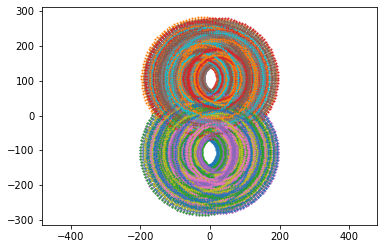

In [141]:
start = time.perf_counter() 
stroke_positions=[]
predicted_positions=[]

for index in range(len(X_test)):
    stroke_positions.append(localization(index))
    predicted_positions.append(clustering(index))
    
end = time.perf_counter()

    


In [142]:
start-end

-112.88395119999768

In [159]:
stroke_positions

[array([[-11.9999125 , -33.99991016]]),
 array([[-27.96718594,  46.00006875]]),
 array([[-35.99993594,  22.00004531],
        [-35.99993594,  22.00004531],
        [-35.99993594,  22.00004531]]),
 array([[-35.99993594,  -9.99998594]]),
 array([[-19.99992031,  -9.99998594],
        [-19.99992031,  -9.99998594],
        [-19.99992031,  -9.99998594]]),
 array([[44.00004297, 30.00005313],
        [44.00004297, 30.00005313]]),
 array([[-19.99992031,  54.00007656],
        [-19.99992031,  54.00007656]]),
 array([[20.00001953, -1.99997812],
        [20.00001953, -1.99997812],
        [20.00001953, -1.99997812]]),
 array([[ 4.00000391, -9.99998594]]),
 array([[36.00003516, -1.99997812]]),
 array([[  4.00000391, -49.99992578],
        [  4.00000391, -49.99992578],
        [  4.00000391, -49.99992578]]),
 array([[-27.99992813,  30.00005313],
        [-27.99992813,  30.00005313],
        [-27.99992813,  30.00005313]]),
 array([[-3.99990469, 22.00004531],
        [-3.99990469, 22.00004531],
      

In [152]:
groundtruth=np.array([s[0] for s in stroke_positions])
predict_results=np.array([s[0] for s in predicted_positions])

In [161]:
groundtruth

array([[-11.9999125 , -33.99991016],
       [-27.96718594,  46.00006875],
       [-35.99993594,  22.00004531],
       [-35.99993594,  -9.99998594],
       [-19.99992031,  -9.99998594],
       [ 44.00004297,  30.00005313],
       [-19.99992031,  54.00007656],
       [ 20.00001953,  -1.99997812],
       [  4.00000391,  -9.99998594],
       [ 36.00003516,  -1.99997812],
       [  4.00000391, -49.99992578],
       [-27.99992813,  30.00005313],
       [ -3.99990469,  22.00004531],
       [-27.96996406, -49.99992578],
       [ 28.00002734,  22.00004531],
       [  4.00000391,  14.0000375 ],
       [-35.99993594, -17.99999375],
       [ 20.00001953, -49.99992578],
       [ 20.00001953, -25.99990234],
       [ 28.00002734,  22.00004531],
       [ 28.00002734,  14.0000375 ],
       [ 20.00001953,  46.00006875],
       [  4.00000391,  -1.99997812],
       [ -3.99990469,  70.00009219],
       [ 20.00001953, -25.99990234],
       [ -3.99990469, -33.99991016],
       [  4.00000391,  62.00008438],
 

array([[ -5.43544116, -36.43330546],
       [-26.05791174,  46.1780425 ],
       [-19.51512666,  21.7077304 ],
       [-24.36121823, -11.44291058],
       [ -4.45559471,  -9.65108027],
       [ 39.60762013,  30.43382083],
       [ -5.8505507 ,  55.55349839],
       [ -0.12762583,  -1.07926288],
       [  3.7662    ,  -9.70389643],
       [ 35.51618666,  -3.06772126],
       [  4.12931486, -52.84690202],
       [-21.32085466,  30.07760995],
       [ -5.29818041,  23.83661844],
       [-22.97008565, -50.534535  ],
       [ 24.16930392,  23.06534382],
       [ 10.62475464,  15.15745505],
       [-23.3067346 , -18.04173767],
       [ 15.61460967, -51.98438628],
       [ 21.86644021, -27.1484671 ],
       [ 23.77457197,  21.12119587],
       [ 19.97466175,  14.28011485],
       [ 17.34785755,  49.89336577],
       [  5.78850283,  -2.49704684],
       [ -2.86038594,  73.9576172 ],
       [ 21.74389658, -27.13676495],
       [  3.6315302 , -36.54612239],
       [  3.26413166,  65.08147529],
 

In [157]:
groundtruth[:,0]

array([-11.9999125 , -27.96718594, -35.99993594, -35.99993594,
       -19.99992031,  44.00004297, -19.99992031,  20.00001953,
         4.00000391,  36.00003516,   4.00000391, -27.99992813,
        -3.99990469, -27.96996406,  28.00002734,   4.00000391,
       -35.99993594,  20.00001953,  20.00001953,  28.00002734,
        28.00002734,  20.00001953,   4.00000391,  -3.99990469,
        20.00001953,  -3.99990469,   4.00000391, -11.9999125 ,
       -11.9999125 , -11.9999125 ,   4.00000391, -27.99992813,
       -19.99992031, -11.9999125 ,  -3.99990469,  -3.99990469,
        12.00001172, -19.99992031,  -3.99990469, -35.99993594,
        28.00002734,  -3.99990469, -11.9999125 ,   4.00000391,
       -27.99992813,  12.00001172, -11.9999125 , -19.99992031,
       -19.99992031, -19.99992031,  -3.99990469,  20.00001953,
        28.00002734,  44.00004297,  28.00002734,  12.00001172,
         4.00000391,  36.00003516,  12.00001172,  28.00002734,
       -11.95099766,   4.00000391,  -3.99990469,   4.00

In [168]:
mae_x=mean_absolute_error(groundtruth[:,0],predict_results[:,0])

In [169]:
mae_x

6.857256577190663

In [170]:
mae_y=mean_absolute_error(groundtruth[:,1],predict_results[:,1])

In [171]:
mae_y

1.421263893758999

In [175]:
from scipy.spatial import distance.euclidean

In [178]:
# #绘制天线
# X = df['# X_mm'].values
# Y = df['        Y_mm'].values
# #plt.figure(figsize=(10, 10), dpi=100)
# plt.figure(figsize=(5, 5))
# plt.axis('equal')
# plt.scatter(X, Y)


position_errors=[distance.euclidean(groundtruth[i],predict_results[i]) for i in  range(0,183) ]

In [181]:
np.sum(position_errors)/183

7.413609917130753

# 聚类定位

In [26]:
#平面上所有的散点 
newX=np.concatenate([x8,x15,x0,x7]).reshape(-1,1)
newY=np.concatenate([y8,y15,y0,y7]).reshape(-1,1)
new=np.concatenate([newX,newY],axis=1)
#print(new.shape)

In [27]:
#np.where(np.logical_and(a>=6, a<=10))
#天线区域内的散点
inside=new[np.where(np.logical_and(new[:,0]<=86,new[:,0]>=-86))]

In [28]:
#inside.shape
inside=inside[np.where(np.logical_and(inside[:,1]>=-107,inside[:,1]<=107))]

In [29]:
inside.shape

(175, 2)

In [30]:
bandwidth=estimate_bandwidth(inside, quantile=0.3, n_samples=None, random_state=0, n_jobs=1)

In [31]:
clustering = MeanShift(bandwidth=bandwidth).fit(inside)

In [32]:
labels = clustering.labels_
cluster_centers = clustering.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [34]:
cluster_centers

array([[  2.16394801, -52.86337105]])

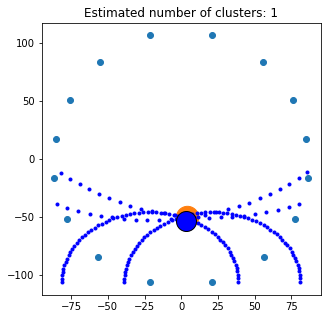

In [93]:

from itertools import cycle

plt.figure(figsize=(5, 5))
plt.axis('equal')

plt.clf()
#[  4.00000391, -49.99992578]
plt.scatter(X, Y)

# x8,y8=draw((-2.118e+01,-1.059e+02),predictions8[10])
# x15,y15=draw((-2.112e+01,1.068e+02),predictions15[10])
# x7,y7=draw((21.18,-105.90),predictions7[10])
# x0,y0=draw((2.112e+01,1.068e+02),predictions0[10])

#plt.scatter([4.00000391], [-49.99992578],s=500)

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(inside[my_members, 0], inside[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=20)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

array([  3.32395883, -53.06952974])